In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
% matplotlib inline

## Dummy data set

In [3]:
data_dummy = pd.DataFrame(
    {
        'A' : np.random.randn(10),
        'B' : 1.5 + 2.5 * np.random.randn(10),
        'C' : np.random.uniform(5, 32, 10)
    }
)

In [4]:
data_dummy.describe()

,A,B,C
count,10.000000,10.000000,10.000000
mean,-0.422401,2.692691,16.317261
std,1.077366,2.619139,7.865334
min,-1.985519,-1.685017,5.183335
25%,-1.026219,1.381453,10.865471
50%,-0.286927,2.569920,16.563644
75%,-0.120451,4.434897,20.716800
max,1.520625,7.235838,31.523055


(array([ 2.,  0.,  1.,  1.,  2.,  2.,  0.,  1.,  0.,  1.]),
 array([-1.98551893, -1.63490449, -1.28429005, -0.9336756 , -0.58306116,
        -0.23244672,  0.11816773,  0.46878217,  0.81939661,  1.17001106,
         1.5206255 ]),
 <a list of 10 Patch objects>)

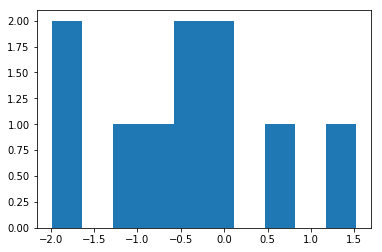

In [5]:
plt.hist(data_dummy["A"])

In [6]:
mainpath = "C:/Users/ddela/GitHub/Gabriel-Udemy/python-ml-course/datasets" # la r delante cambia las barras inclinadas
filename = "/customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filename)

In [7]:
data = pd.read_csv(mainpath + filename)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
column_names = data.columns.values.tolist()

In [9]:
a = len(column_names)
new_dummy_data = pd.DataFrame(
    {
        'Column Names' : column_names,
        'A' : np.random.randn(a),
        'B' : 1.5 + 2.5 * np.random.randn(a)
    }, index = range(1,1+a)  # Ahora el índice comienza en 1
)

## Agregación de datos por categorías

In [10]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]
seed = 2018
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))  
gender_data[0:10]

['Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male']

In [11]:
# z = N(0,1)
# N(n, s) -> m + s * z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

data2 = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

data2.head()

,Age,Economic,Gender,Height,Income,Weight
0,50.102859,Rich,Female,178.476696,21630.823484,81.706330
1,37.071862,Poor,Male,106.069904,17234.404231,87.600397
2,29.253357,Middle Class,Male,196.211366,18799.457033,68.369028
3,45.108000,Rich,Female,171.501486,16350.913558,51.424793
4,2.109854,Poor,Female,134.672107,17388.574325,59.542004


In [12]:
grouped_gender = data2.groupby("Gender")

In [13]:
for names, groups in grouped_gender:
    print(names)
    print(groups.head())

Female
         Age      Economic  Gender      Height        Income     Weight
0  50.102859          Rich  Female  178.476696  21630.823484  81.706330
3  45.108000          Rich  Female  171.501486  16350.913558  51.424793
4   2.109854          Poor  Female  134.672107  17388.574325  59.542004
5  39.556631  Middle Class  Female  112.771008  19502.441036 -11.163625
7  33.238012          Rich  Female  106.155332   9996.322585  74.330113
Male
         Age      Economic Gender      Height        Income     Weight
1  37.071862          Poor   Male  106.069904  17234.404231  87.600397
2  29.253357  Middle Class   Male  196.211366  18799.457033  68.369028
6  41.690195          Poor   Male   82.186786  17429.985507  98.894943
8  25.389832          Poor   Male  181.358350  24414.156863  62.332698
9  41.970133          Poor   Male  166.074094  18449.667371  86.914155


In [14]:
grouped_gender.get_group("Male").head()

,Age,Economic,Gender,Height,Income,Weight
1,37.071862,Poor,Male,106.069904,17234.404231,87.600397
2,29.253357,Middle Class,Male,196.211366,18799.457033,68.369028
6,41.690195,Poor,Male,82.186786,17429.985507,98.894943
8,25.389832,Poor,Male,181.358350,24414.156863,62.332698
9,41.970133,Poor,Male,166.074094,18449.667371,86.914155


In [15]:
double_group = data2.groupby(["Gender","Economic"])
double_group.sum()

Age        Height        Income       Weight
Gender Economic                                                          
Female Middle Class  2296.284171  12736.350180  1.432218e+06  5417.626125
       Poor          2672.917473  13099.315858  1.442817e+06  5326.247161
       Rich          2976.817203  14793.826651  1.725390e+06  5851.384554
Male   Middle Class  2219.174669  12660.382493  1.373401e+06  5321.959413
       Poor          3003.512517  14594.950332  1.764052e+06  6114.851388
       Rich          2210.428768  11034.235992  1.300350e+06  4436.836781

In [16]:
double_group.size()

Gender  Economic    
Female  Middle Class    79
        Poor            81
        Rich            95
Male    Middle Class    78
        Poor            94
        Rich            73
dtype: int64

In [17]:
double_group.aggregate(
    {
        "Income" : np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic                                        
Female Middle Class  1.432218e+06  29.066888  31.061625
       Poor          1.442817e+06  32.998981  31.710241
       Rich          1.725390e+06  31.334918  27.557628
Male   Middle Class  1.373401e+06  28.450957  28.346761
       Poor          1.764052e+06  31.952261  29.838129
       Rich          1.300350e+06  30.279846  29.615911

In [18]:
double_group.aggregate(
    {
        "Income" : np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic                                        
Female Middle Class  1.432218e+06  29.066888  31.061625
       Poor          1.442817e+06  32.998981  31.710241
       Rich          1.725390e+06  31.334918  27.557628
Male   Middle Class  1.373401e+06  28.450957  28.346761
       Poor          1.764052e+06  31.952261  29.838129
       Rich          1.300350e+06  30.279846  29.615911

In [19]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h : np.mean(h) / np.std(h)
    }
)

Age    Height
Gender Economic                         
Female Middle Class  29.066888  5.223481
       Poor          32.998981  5.131704
       Rich          31.334918  5.680845
Male   Middle Class  28.450957  5.763028
       Poor          31.952261  5.231493
       Rich          30.279846  5.139129

In [20]:
double_group.aggregate([np.sum,np.mean,np.std])

Age                              Height  \
                             sum       mean        std           sum   
Gender Economic                                                        
Female Middle Class  2296.284171  29.066888   9.731744  12736.350180   
       Poor          2672.917473  32.998981  12.399190  13099.315858   
       Rich          2976.817203  31.334918  13.000519  14793.826651   
Male   Middle Class  2219.174669  28.450957  11.636943  12660.382493   
       Poor          3003.512517  31.952261  11.802988  14594.950332   
       Rich          2210.428768  30.279846  11.372955  11034.235992   

                                                  Income                \
                           mean        std           sum          mean   
Gender Economic                                                          
Female Middle Class  161.219623  31.061625  1.432218e+06  18129.338004   
       Poor          161.719949  31.710241  1.442817e+06  17812.559787   
       Rich          155.724491  27.557628  1.725390e+06  18161.999661   
Male   Middle Class  162.312596  28.346761  1.373401e+06  17607.708568   
       Poor          155.265429  29.838129  1.764052e+06  18766.513516   
       Rich          151.153918  29.615911  1.300350e+06  17813.018046   

                                       Weight                        
                             std          sum       mean        std  
Gender Economic                                                      
Female Middle Class  3916.635752  5417.626125  68.577546  25.553550  
       Poor          3942.906489  5326.247161  65.756138  22.019671  
       Rich          3320.010632  5851.384554  61.593522  23.942457  
Male   Middle Class  3363.773446  5321.959413  68.230249  24.519443  
       Poor          3300.361943  6114.851388  65.051611  24.113306  
       Rich          3634.169153  4436.836781  60.778586  24.317950

In [21]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Age    Height    Income    Weight
                     <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic                                            
Female Middle Class  3.005897  5.223481  4.658381  2.700828
       Poor          2.677964  5.131704  4.545769  3.004851
       Rich          2.423069  5.680845  5.499486  2.586212
Male   Middle Class  2.460707  5.763028  5.268392  2.800711
       Poor          2.721649  5.231493  5.716688  2.712213
       Rich          2.680868  5.139129  4.935459  2.516627

## Filtrado de datos

In [22]:
double_group["Age"].filter(lambda x : x.sum()>2400).head()

0    50.102859
1    37.071862
3    45.108000
4     2.109854
6    41.690195
Name: Age, dtype: float64

## Transformación de variables

In [23]:
zscore = lambda x : (x - np.mean(x))/ np.std(x)

In [24]:
z_group = double_group.transform(zscore)

(array([   4.,   10.,   52.,   71.,  117.,  124.,   87.,   26.,    8.,    1.]),
 array([-3.19456885, -2.54100086, -1.88743288, -1.23386489, -0.5802969 ,
         0.07327108,  0.72683907,  1.38040706,  2.03397504,  2.68754303,
         3.34111101]),
 <a list of 10 Patch objects>)

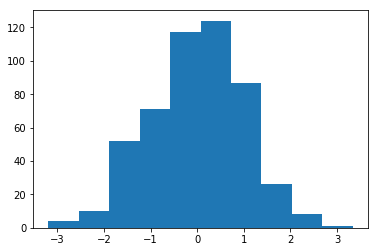

In [25]:
plt.hist(z_group["Age"])

In [26]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [27]:
double_group.transform(fill_na_mean).head()

,Age,Height,Income,Weight
0,50.102859,178.476696,21630.823484,81.706330
1,37.071862,106.069904,17234.404231,87.600397
2,29.253357,196.211366,18799.457033,68.369028
3,45.108000,171.501486,16350.913558,51.424793
4,2.109854,134.672107,17388.574325,59.542004


## Operaciones diversas muy útiles

In [28]:
double_group.head(1)

,Age,Economic,Gender,Height,Income,Weight
0,50.102859,Rich,Female,178.476696,21630.823484,81.706330
1,37.071862,Poor,Male,106.069904,17234.404231,87.600397
2,29.253357,Middle Class,Male,196.211366,18799.457033,68.369028
4,2.109854,Poor,Female,134.672107,17388.574325,59.542004
5,39.556631,Middle Class,Female,112.771008,19502.441036,-11.163625
48,14.772369,Rich,Male,119.251532,22662.722846,74.006409


In [29]:
double_group.tail(1)

,Age,Economic,Gender,Height,Income,Weight
481,36.523060,Middle Class,Male,207.895954,22018.118934,89.449359
489,29.774603,Rich,Male,146.231344,17695.635492,97.800746
492,17.992922,Poor,Female,192.378364,11822.477395,78.326204
494,40.822216,Poor,Male,120.978748,26623.321095,103.477981
498,27.067523,Middle Class,Female,256.009400,20630.559676,38.483504
499,15.062066,Rich,Female,132.856028,19533.109653,66.852460


In [30]:
double_group.nth(70)  # Obtiene la fila 70 de cada grupo y lo devuelve en formato tabla agrupada en vez de en DataFrame

Age      Height        Income     Weight
Gender Economic                                                    
Female Middle Class  26.657044  110.656710  14711.366575  80.607299
       Poor          17.005203  213.670930  26654.199133  64.882488
       Rich           6.972577  173.810476   8413.931170  40.205446
Male   Middle Class  16.270355  164.746255  18686.466524  91.975393
       Poor          10.391334  158.119664  17005.617205  54.058923
       Rich           4.808339  143.250186  17698.538110  80.569095

In [31]:
data_sorted = data2.sort_values(["Age", "Income"])

In [32]:
data_sorted.head(10)

,Age,Economic,Gender,Height,Income,Weight
109,-5.659583,Middle Class,Male,155.285333,15099.246152,48.199958
341,-5.552099,Poor,Male,159.542869,22174.810012,58.427314
204,-2.869562,Rich,Female,134.554610,21039.632393,68.011168
4,2.109854,Poor,Female,134.672107,17388.574325,59.542004
111,4.070788,Rich,Male,129.112549,15163.822616,51.030032
343,4.353811,Middle Class,Female,174.250697,25638.994571,72.856266
378,4.446093,Rich,Female,167.250266,17890.176521,78.465437
238,4.567923,Middle Class,Male,152.546221,18296.815520,63.834262
474,4.808339,Rich,Male,143.250186,17698.538110,80.569095
66,6.928553,Rich,Male,127.455170,20956.646079,73.149911


In [34]:
age_grouped = data_sorted.groupby("Gender")

In [37]:
age_grouped.get_group("Male").head()

,Age,Economic,Height,Income,Weight
109,-5.659583,Middle Class,155.285333,15099.246152,48.199958
341,-5.552099,Poor,159.542869,22174.810012,58.427314
111,4.070788,Rich,129.112549,15163.822616,51.030032
238,4.567923,Middle Class,152.546221,18296.815520,63.834262
474,4.808339,Rich,143.250186,17698.538110,80.569095
